In [165]:
import numpy as np
from sklearn.preprocessing  import StandardScaler
import matplotlib.pyplot as plt

In [166]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
print(cancer.DESCR)
X, t = load_breast_cancer(return_X_y=True)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [167]:
sc = StandardScaler()
np.random.seed(1862)#400121862
X_train,X_test,t_train,t_test=train_test_split(X,t,test_size=1/4,random_state=1862)
X_train[:, :]  = sc.fit_transform(X_train[:, :])
X_test[:, :]  = sc.transform(X_test[:, :])

In [168]:
M = len(X_test)
N = len(X_train)
new_col_train=np.ones(N)
new_col_test=np.ones(M)
X1_train = np.insert(X_train,0,new_col_train,axis=1)

X1_test = np.insert(X_test,0,new_col_test,axis=1)

In [169]:
#class 0
i0 = np.asarray(np.nonzero(t_train==0)) #indexes where class is 0

[m,n] = i0.shape
X_train_0 = np.zeros((n,30))
t_train_0 = np.zeros(n)

for i in range(n):
    X_train_0[i,:] = X_train[i0[0,i],:] 

#class 1
i1 = np.asarray(np.nonzero(t_train==1)) #indexes where class is 1
[m,n] = i1.shape
X_train_1 = np.zeros((n,30))
t_train_1 = np.ones(n)

for i in range(n):
    X_train_1[i,:] = X_train[i1[0,i],:] 
  

In [170]:
def find_z(array,w):
    z= (np.matmul((array),(w)))
    return z

In [171]:
w = -10*np.ones(31)
w_test = -10*np.ones(31)
z = find_z(X1_train,w)
IT = 5000
gr_norms = np.zeros(IT) # to store squared norm of gradient at ecah iteration
cost = np.zeros(IT)  # to store the cost at each iteration
alpha=1
print(np.shape(X1_train))
print(np.shape(t_train))

(426, 31)
(426,)


In [172]:
def logistic_regression(x,w,z,t,length):
    for n in range(IT):
        y=(1/(1 + np.exp(-z)))
        diff = y-t
        gr = np.dot(x.T, diff.T)/N # this is the gradient
        #compute squared norm of the gradient
        gr_norm_sq = np.dot(gr,np.transpose(gr))
        gr_norms[n] = gr_norm_sq
        #update the vector of parameters
        w = w - alpha * gr 
        #compute the cost
        cost[n] = 0
    for i in range(length):
        cost[n] += t[i]*np.logaddexp(0, -z[i]) + (1-t[i])*np.logaddexp(0,z[i])
    cost[n] = cost[n]/length
    
    return [y,cost,w]

In [173]:
lce = logistic_regression(X1_train,w,z,t_train,N)
print(lce)
z_test = find_z(X1_test,w_test)

[array([1.00000000e+000, 1.00000000e+000, 1.00000000e+000, 5.60042130e-110,
       1.00000000e+000, 1.00000000e+000, 1.22466651e-023, 1.00000000e+000,
       1.19190040e-077, 1.36786925e-101, 1.00000000e+000, 1.00000000e+000,
       1.00000000e+000, 1.00000000e+000, 1.00000000e+000, 1.78625953e-137,
       1.00000000e+000, 1.00000000e+000, 1.00000000e+000, 1.00000000e+000,
       1.00000000e+000, 1.00000000e+000, 3.05477382e-139, 6.08234548e-065,
       1.00000000e+000, 1.00000000e+000, 1.00000000e+000, 3.52163782e-051,
       1.00000000e+000, 9.99999998e-001, 1.47679316e-073, 3.12897468e-072,
       1.00000000e+000, 8.02268282e-106, 3.89265177e-055, 5.85348059e-024,
       1.00000000e+000, 5.73537239e-127, 1.00000000e+000, 1.06672265e-134,
       1.00000000e+000, 1.00000000e+000, 9.99985893e-001, 4.37002578e-056,
       1.00000000e+000, 7.23949806e-068, 1.96270241e-055, 2.33077534e-103,
       3.28847730e-043, 1.00000000e+000, 1.00000000e+000, 1.51092174e-055,
       1.00000000e+000, 

In [174]:
def misclassification_rate(z,threshold):
    y = np.zeros(M)
    for i in range(M):
        if(z[i]>=threshold):
            y[i]=1
    u = y - t_test
    err = np.count_nonzero(u)/M  #mislassification rate
    return[y,u,err]

In [175]:
print(misclassification_rate(z_test,0)[2])

0.09090909090909091


In [176]:
def F1_score_and_Precision_Recall(predicted_class,t):
    #from sklearn.metrics import plot_precision_recall_curve
    import matplotlib.pyplot as plt
    tp = 0
    fp = 0
    fn = 0
    for i in range(len(predicted_class)):
        if (predicted_class[i]==t[i] and predicted_class[i]==1):
            tp = tp + 1
        elif (predicted_class[i]!=t[i] and predicted_class[i]==1):
            fp = fp + 1
        elif (predicted_class[i]!=t[i] and predicted_class[i]==0):
            fn = fn + 1
            
    P = tp/(tp+fp)
    R = tp/(tp+fn)
    
    F1 = 2*((P*R)/(P+R))
    return [P,R,F1]
    

In [177]:
precision = np.empty(M)
recall = np.empty(M)
z = np.argsort(z)
for i in range(M):
    predicted_class= (misclassification_rate(z,z[i])[0])
    precision = np.append(precision,[F1_score_and_Precision_Recall(predicted_class,t_train)[0]],axis=0)
    recall = np.append(recall,[F1_score_and_Precision_Recall(predicted_class,t_train)[1]],axis=0)

[[9.95577032e-06 9.99990044e-01]
 [2.46820663e-01 7.53179337e-01]
 [7.82528545e-04 9.99217471e-01]
 [9.99998576e-01 1.42379146e-06]
 [1.36837510e-04 9.99863162e-01]
 [3.38121438e-03 9.96618786e-01]
 [9.98809007e-01 1.19099301e-03]
 [2.76545889e-04 9.99723454e-01]
 [9.87409077e-01 1.25909225e-02]
 [9.99931985e-01 6.80145364e-05]
 [2.06936734e-05 9.99979306e-01]
 [4.37677269e-04 9.99562323e-01]
 [1.90091518e-03 9.98099085e-01]
 [1.02782142e-02 9.89721786e-01]
 [1.38795077e-03 9.98612049e-01]
 [9.99999955e-01 4.53222874e-08]
 [1.01506497e-04 9.99898494e-01]
 [2.47292780e-07 9.99999753e-01]
 [3.54232943e-01 6.45767057e-01]
 [6.14280327e-04 9.99385720e-01]
 [1.15339265e-01 8.84660735e-01]
 [7.61046161e-04 9.99238954e-01]
 [9.99998684e-01 1.31557231e-06]
 [9.99637097e-01 3.62902906e-04]
 [1.26735902e-03 9.98732641e-01]
 [9.10923678e-02 9.08907632e-01]
 [1.95054941e-05 9.99980495e-01]
 [9.74311047e-01 2.56889529e-02]
 [3.16274005e-03 9.96837260e-01]
 [4.39732862e-02 9.56026714e-01]
 [9.998400

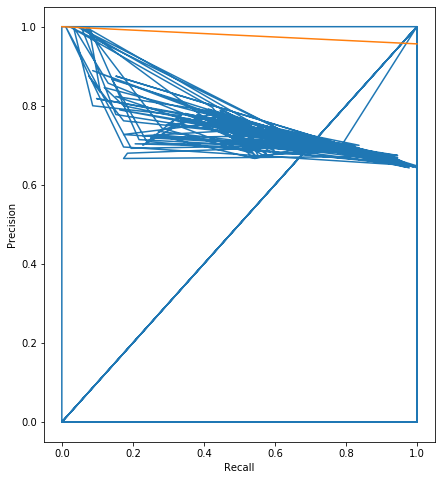

In [178]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
model = LogisticRegression(solver='liblinear')
model.fit(X1_train,t_train)
p_pred = model.predict_proba(X1_train)
y_pred = model.predict(X1_test)
score_ = model.score(X1_test, t_test)
conf_m = confusion_matrix(t_test, y_pred)
report = classification_report(t_test, y_pred)
print(p_pred)
print(y_pred)
print(score_)
print(conf_m)
print(report)
from sklearn.metrics import precision_recall_curve
y_true = t_test
y_scores =y_pred
precision_kit, recall_kit, thresholds_kit = precision_recall_curve(y_true, y_scores)
from itertools import cycle
colors = cycle(['navy', 'turquoise', 'darkorange'])

plt.figure(figsize=(7, 8))
f_scores = np.linspace(0.2, 0.8, num=4)
lines = []
labels = []
for i, color in zip(range(2), colors):
    l, = plt.plot(recall_kit[i], precision_kit[i], color=color, lw=2)
    lines.append(l)
plt.plot(recall,precision)
plt.plot(recall_kit,precision_kit)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

In [179]:
# split data into training and test sets
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
kf = KFold(n_splits=5)
print(kf.get_n_splits(X))
print(KFold(n_splits=5, random_state=1862, shuffle=False))
i=1
for train_index, test_index in kf.split(X):#split the data into 5 different folds
    if (i==1):
        X_train1, X_test1 = X[train_index], X[test_index]
        t_train1, t_test1 = t[train_index], t[test_index]
        i= i + 1
    elif (i==2):
        X_train2, X_test2 = X[train_index], X[test_index]
        t_train2, t_test2 = t[train_index], t[test_index]
        i= i + 1
    elif (i==3):
        X_train3, X_test3 = X[train_index], X[test_index]
        t_train3, t_test3 = t[train_index], t[test_index]
        i= i + 1
    elif (i==4):
        X_train4, X_test4 = X[train_index], X[test_index]
        t_train4, t_test4 = t[train_index], t[test_index]
        i= i + 1
    elif (i==5):
        X_train5, X_test5 = X[train_index], X[test_index]
        t_train5, t_test5 = t[train_index], t[test_index]
    else: 
        break;
        
    
M = len(X_test1) #number rows in test set
N = len(X_train1) #number rows in train set  
new_col=np.ones(M)
new_col2 = np.ones(N)
new_col3 = np.ones(N+1)
new_col4=np.ones(M-1)
X1_train = np.insert(X_train1, 0, new_col2, axis=1)
X2_train = np.insert(X_train2, 0, new_col2, axis=1)
X3_train = np.insert(X_train3, 0, new_col2, axis=1)
X4_train = np.insert(X_train4, 0, new_col2, axis=1)
X5_train = np.insert(X_train5, 0, new_col3, axis=1)
# add dummy in test set
new_col=np.ones(M)
X1_test = np.insert(X_test1, 0, new_col, axis=1)
X2_test = np.insert(X_test2, 0, new_col, axis=1)
X3_test = np.insert(X_test3, 0, new_col, axis=1)
X4_test = np.insert(X_test4, 0, new_col, axis=1)
X5_test = np.insert(X_test5, 0, new_col4, axis=1)

5
KFold(n_splits=5, random_state=1862, shuffle=False)


In [180]:
def classification_NN(z,neighbours):
    for k in range(5):
        if (k==0):
            train = np.concatenate((X2_train,X3_train,X4_train,X5_train),axis=0)
            train_target = np.concatenate((t_train2,t_train3,t_train4,t_train5),axis=0)
            test = X1_train
            test_target = t_train1
            dist = np.zeros((len(test),len(train))) #2dim array to store distances from test points to trainig points
            ind = np.zeros((len(test),len(train)))  #2dim array to store the order after sorting the distances
            u = np.arange(len(train))       # array of numbers from 0 to N-1
            for j in range(len(test)):
                ind[j,:] = u
            for j in range(len(test)): #each test point
                for i in range(len(train)): #each training point
                    z = train[i,:]-test[j,:]
                    dist[j,i] = np.dot(z,z)
            ind = np.argsort(dist)
            y = np.zeros(len(test)) # initialize array of predictions
            for j in range(len(test)):
                for l in range(neighbours):
                    y[j] = y[j]+train_target[ind[j,l]]
                y[j]=y[j]/neighbours
            z = y - test_target
            err = np.count_nonzero(z)/len(test)  #mislassification rate
            
        if (k==1):
            train = np.concatenate((X1_train,X3_train,X4_train,X5_train),axis=0)
            train_target = np.concatenate((t_train1,t_train3,t_train4,t_train5),axis=0)
            test = X2_train
            test_target = t_train2
            dist = np.zeros((len(test),len(train))) #2dim array to store distances from test points to trainig points
            ind = np.zeros((len(test),len(train)))  #2dim array to store the order after sorting the distances
            u = np.arange(len(train))       # array of numbers from 0 to N-1
            for j in range(len(test)):
                ind[j,:] = u
            for j in range(len(test)): #each test point
                for i in range(len(train)): #each training point
                    z = train[i,:]-test[j,:]
                    dist[j,i] = np.dot(z,z)
            ind = np.argsort(dist)
            y = np.zeros(len(test)) # initialize array of predictions
            for j in range(len(test)):
                for l in range(neighbours):
                    y[j] = y[j]+train_target[ind[j,l]]
                y[j]=y[j]/neighbours
            z = y - test_target
            err = err + np.count_nonzero(z)/len(test)  #mislassification rate
        
        if (k==2):
            train = np.concatenate((X1_train,X2_train,X4_train,X5_train),axis=0)
            train_target = np.concatenate((t_train1,t_train2,t_train4,t_train5),axis=0)
            test = X3_train
            test_target = t_train3
            dist = np.zeros((len(test),len(train))) #2dim array to store distances from test points to trainig points
            ind = np.zeros((len(test),len(train)))  #2dim array to store the order after sorting the distances
            u = np.arange(len(train))       # array of numbers from 0 to N-1
            for j in range(len(test)):
                ind[j,:] = u
            for j in range(len(test)): #each test point
                for i in range(len(train)): #each training point
                    z = train[i,:]-test[j,:]
                    dist[j,i] = np.dot(z,z)
            ind = np.argsort(dist)
            y = np.zeros(len(test)) # initialize array of predictions
            for j in range(len(test)):
                for l in range(neighbours):
                    y[j] = y[j]+train_target[ind[j,l]]
                y[j]=y[j]/neighbours
            z = y - test_target
            err = err + np.count_nonzero(z)/len(test)  #mislassification rate
            
        if (k==3):
            train = np.concatenate((X1_train,X2_train,X3_train,X5_train),axis=0)
            train_target = np.concatenate((t_train1,t_train2,t_train3,t_train5),axis=0)
            test = X4_train
            test_target = t_train4
            dist = np.zeros((len(test),len(train))) #2dim array to store distances from test points to trainig points
            ind = np.zeros((len(test),len(train)))  #2dim array to store the order after sorting the distances
            u = np.arange(len(train))       # array of numbers from 0 to N-1
            for j in range(len(test)):
                ind[j,:] = u
            for j in range(len(test)): #each test point
                for i in range(len(train)): #each training point
                    z = train[i,:]-test[j,:]
                    dist[j,i] = np.dot(z,z)
            ind = np.argsort(dist)
            y = np.zeros(len(test)) # initialize array of predictions
            for j in range(len(test)):
                for l in range(neighbours):
                    y[j] = y[j]+train_target[ind[j,l]]
                y[j]=y[j]/neighbours
            z = y - test_target
            err = err + np.count_nonzero(z)/len(test)  #mislassification rate
            
        if (k==4):
            train = np.concatenate((X1_train,X2_train,X3_train,X4_train),axis=0)
            train_target = np.concatenate((t_train1,t_train2,t_train3,t_train4),axis=0)
            test = X5_train
            test_target = t_train5
            dist = np.zeros((len(test),len(train))) #2dim array to store distances from test points to trainig points
            ind = np.zeros((len(test),len(train)))  #2dim array to store the order after sorting the distances
            u = np.arange(len(train))       # array of numbers from 0 to N-1
            for j in range(len(test)):
                ind[j,:] = u
            for j in range(len(test)): #each test point
                for i in range(len(train)): #each training point
                    z = train[i,:]-test[j,:]
                    dist[j,i] = np.dot(z,z)
            ind = np.argsort(dist)
            y = np.zeros(len(test)) # initialize array of predictions
            for j in range(len(test)):
                for l in range(neighbours):
                    y[j] = y[j]+train_target[ind[j,l]]
                y[j]=y[j]/neighbours
            z = y - test_target
            err = err + np.count_nonzero(z)/len(test)  #mislassification rate

        train = np.concatenate((X1_train,X2_train,X3_train,X4_train,X5_train),axis=0)
        train_target = np.concatenate((t_train1,t_train2,t_train3,t_train4,t_train5),axis=0)
        test = X_test
        test_target = t_test
        dist = np.zeros((len(test),len(train))) #2dim array to store distances from test points to trainig points
        ind = np.zeros((len(test),len(train)))  #2dim array to store the order after sorting the distances
        u = np.arange(len(train))       # array of numbers from 0 to N-1
        for j in range(len(test)):
            ind[j,:] = u
        for j in range(len(test)): #each test point
            for i in range(len(train)): #each training point
                z = train[i,:-1]-test[j,:]
                dist[j,i] = np.dot(z,z)
        ind = np.argsort(dist)
        y = np.zeros(len(test)) # initialize array of predictions
        for j in range(len(test)):
            for l in range(neighbours):
                y[j] = y[j]+train_target[ind[j,l]]
            y[j]=y[j]/neighbours
        z = y - test_target
        test_err = err + np.count_nonzero(z)/len(test)  #mislassification rate
    return err,test_err

In [181]:
print(classification_NN(z,1))
print(classification_NN(z,2))
print(classification_NN(z,3))
print(classification_NN(z,4))
print(classification_NN(z,5))

(0.0, 0.38461538461538464)
(0.0, 0.38461538461538464)
(0.0, 0.38461538461538464)
(0.42179005205320996, 0.8064054366685947)
(0.42179005205320996, 0.8064054366685947)


In [182]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors, datasets
from sklearn.model_selection import cross_val_score
for i in range(1,6):
    n_neighbors = i
    h = .02  # step size in the mesh

    for weights in ['uniform', 'distance']:
        # we create an instance of Neighbours Classifier and fit the data.
        clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
        clf.fit(X_train, t_train)
        clf_predict = clf.predict(X_test)
    err=0
    for i in range(5):
        err = err + cross_val_score(clf,X_test,t_test,cv=5)[i]
    err = err/5
    print(err)
    clf_test = neighbors.KNeighborsClassifier(n_neighbors=i, weights=weights)
    clf_test.fit(X_test, t_test)
    print(clf_test.score(X_test, t_test))

0.9433497536945813
1.0
0.9433497536945813
1.0
0.9507389162561577
1.0
0.9435960591133006
1.0
0.9652709359605911
1.0
